1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

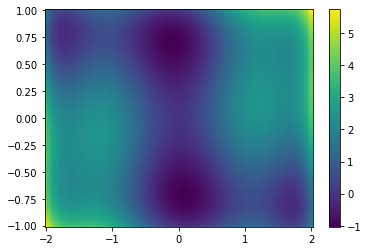

first minimum:  [ 0.08984194 -0.71265598] 
global minimum:  -1.0316284534884417


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy
from scipy import optimize

#Define the function
def f(v):
    x, y = v
    return (4 - 2.1 * x**2 + (x**4) / 3) * x**2 + x*y + (4*y**2 - 4)*y**2
    
#Create the grid
N=100
x = np.linspace(-2, 2, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x,y, indexing='xy')

Z = f([X, Y])

#plot the region
plt.figure()
plt.pcolor(X, Y, Z)
plt.colorbar()
plt.show()

#there appear to be two global minima, symmetrical with respect to the origin
#(indeed the system enjoys Z2 x Z2 symmetry)

#find the solution, using (0.1, -1) as initial guess
minimum = optimize.minimize(f, x0=(0.1, -1))
print("first minimum: ", minimum['x'], "\nglobal minimum: ", f(minimum['x']))

#the other solution can be found simply swapping the sign to both x and y
#f() value in that point does not change.

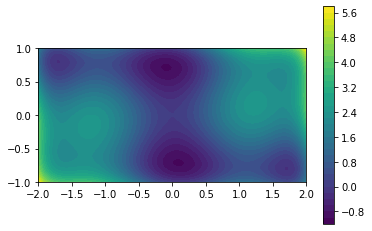


solution:  [-1.60710511 -0.56865106] 
value of f:  2.104250310312304

solution:  [ 0.08984201 -0.71265645] 
value of f:  -1.0316284534898557

solution:  [ 1.70360667 -0.79608362] 
value of f:  -0.21546382438366485

solution:  [-1.70360668  0.79608361] 
value of f:  -0.21546382438368683

solution:  [-0.08984202  0.71265644] 
value of f:  -1.0316284534898665

solution:  [1.60710509 0.56865105] 
value of f:  2.1042503103122936


In [40]:
#here the region of interest has been plotted displaying contour lines
#which make more clear the presence of six local minima
h = plt.contourf(X, Y, Z, levels=40)
plt.axis('scaled')
plt.colorbar()
plt.show()

#define a grid of initial guesses
x0 = np.linspace(-1.5, 1.5, 3)
y0 = np.linspace(-0.5, 0.5, 2)
X0, Y0 = np.meshgrid(x0,y0)

for i in range(2):
    for j in range(3):
        solution = optimize.minimize(f, x0=(X0[i][j], Y0[i][j]))
        print("\nsolution: ", solution['x'], "\nvalue of f: ", f(solution['x']))

In [41]:
#Use (0,0) as initial guess
solution_0 = optimize.minimize(f, x0=(0, 0))
print("solution: ", solution_0['x'], "\nvalue of f(0,0): ", f(solution_0['x']))

#the algorithm finds (0,0) as a minimum, but actually it is a saddle point

solution:  [0. 0.] 
value of f(0,0):  0.0


2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

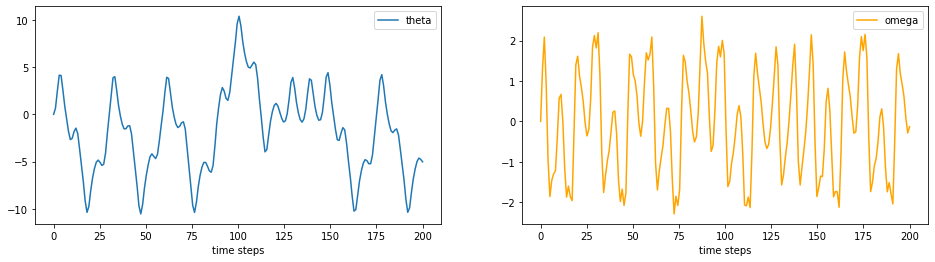

In [5]:
from scipy.integrate import odeint
import numpy as np

#Write the derivative of omega
def func(X, t, Q, d, Omega):
    theta, omega = X
    return (omega, -(1/Q)*omega + np.sin(theta) + d*np.cos(Omega*t))

# define the interval of integration
N=200
t = np.linspace(0, N, N)

#Set the initial conditions and values of the parameters
X0 = [0, 0]
Q = 2.0
d = 1.5
Omega = 0.65

#solve the ODE
sol = odeint(func, y0 = X0, t=t, args=(Q, d, Omega))


#Extract theta and omega from the solution array
theta = sol[:, 0]
omega = sol[:, 1]

#Plot the results
fig, axes = plt.subplots(1, 2, figsize = (16, 4))
axes[0].plot(t, theta, label='theta')
axes[1].plot(t, omega, color = "orange", label='omega')
axes[0].set_xlabel('time steps')
axes[1].set_xlabel('time steps')
axes[0].legend()
axes[1].legend()
plt.show()

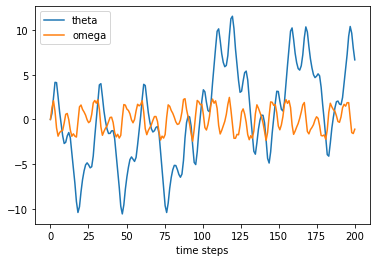

In [6]:
#Generate another solution, with the inital point perturbed
#with respect to the previous case
X02 = [0.001, 0.001]
sol2 = odeint(func, y0 = X02, t=t, args=(Q, d, Omega))

# Extract theta and omega from the solution array
theta2 = sol2[:, 0]
omega2 = sol2[:, 1]

# Plot the results
plt.plot(t, theta2, label='theta')
plt.plot(t, omega2, label='omega')
plt.xlabel('time steps')
plt.legend()
plt.show()

Distance between the two initial points:  0.001414213562373095
Distance between the two end points:  11.722358617376848


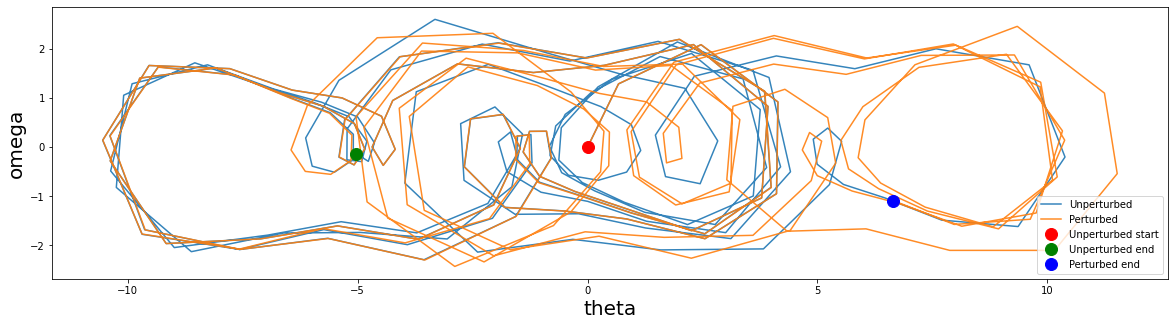

Lambda:  0.04682955752307918


In [7]:
#Now try to find any sign of chaos:

#Look for a Lyapunov exponent
d0_omega=abs(omega[0]-omega2[0]) #initial distance in omega
dt_omega=abs(omega[N-1]-omega2[N-1])#final distance in omega

d0_theta=abs(theta[0]-theta2[0]) #initial distance in theta
dt_theta=abs(theta[N-1]-theta2[N-1]) #final distance in theta

#distance between the two final points (unperturbed and perturbed)
#in the (thetta, omega) space
r0 = np.sqrt(d0_omega**2 + d0_theta**2)
r = np.sqrt(dt_omega**2 + dt_theta**2)
print("Distance between the two initial points: ", r0)
print("Distance between the two end points: ", r)

#plot omega vs theta, highlighting the different trajectories
plt.figure(figsize=(20, 5))
plt.plot(theta, omega, alpha=0.9, label='Unperturbed')
plt.plot(theta2, omega2, alpha=0.9, label='Perturbed')
plt.plot(theta[0], omega[0], 'o', markersize=12,
         color='red', label='Unperturbed start')
plt.plot(theta[N-1], omega[N-1], 'o', markersize=12,
         color='green', label='Unperturbed end')
plt.plot(theta2[N-1], omega2[N-1], 'o', markersize=12,
         color='blue', label='Perturbed end')
plt.legend()
plt.xlabel("theta", fontsize = 20)
plt.ylabel("omega", fontsize = 20)
plt.show()

#look for a Lyapunov exponent
LAMBDA = 1/N * (np.log(dt_theta/d0_theta))
print("Lambda: ", LAMBDA) 
#this analisys does not tell much... one should bring N to inf

#comparing the distance between the initial pertubation and the 
#final distance at which the two end points are located, I conclude that 
#the system is sensitive to initial conditions, which is a characteristic 
#of chaotic systems.

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

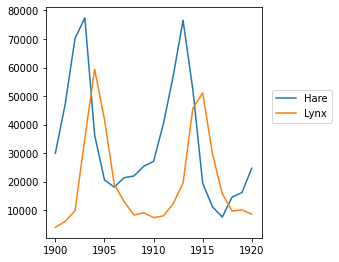

In [8]:
import pandas as pd
from scipy import fftpack
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#loading the data
data = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = data.T

# Plot 
plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes) 
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5))

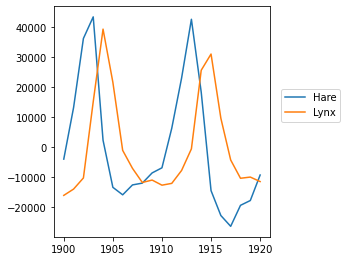

In [9]:
#Remove DC bias
hares -= np.mean(hares)
lynxes -= np.mean(lynxes)
# Plot 
plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes) 
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5))

Peak period for hares: 10.5 yr
Peak period for lynxes: 10.5 yr


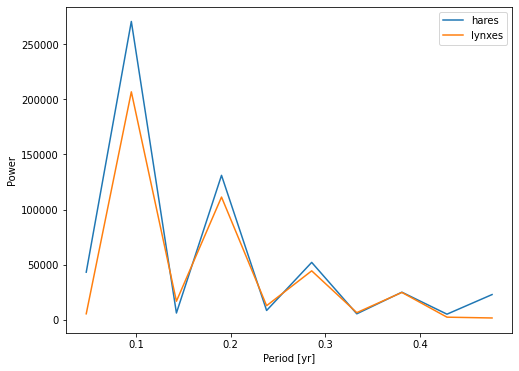

In [10]:
# The FFT of the signal
hare_fft = fftpack.fft(hares)
lynx_fft = fftpack.fft(lynxes)

#And the power 
hare_pow = np.abs(hare_fft)
lynx_pow = np.abs(lynx_fft)

#Return the corresponding frequencies
hare_freq = fftpack.fftfreq(np.size(hares), d=1)
lynx_freq = fftpack.fftfreq(np.size(lynxes), d=1)
hare_mask = np.where(hare_freq > 0)
lynx_mask = np.where(lynx_freq > 0)
h_freqs = hare_freq[hare_mask]
l_freqs = lynx_freq[lynx_mask]
h_powes = hare_pow[hare_mask]
l_powes = lynx_pow[lynx_mask]

# find the peak in periods array
hare_peak = 1./h_freqs[np.argmax(h_powes)]
lynx_peak = 1./l_freqs[np.argmax(l_powes)]
print("Peak period for hares: %.1f yr" % hare_peak)
print("Peak period for lynxes: %.1f yr" % lynx_peak)

#Plot the FFT power
plt.figure(figsize=(8, 6))
plt.plot(1./h_freqs, h_powes, label = 'hares')
plt.plot(1./l_freqs, l_powes, label = 'lynxes')
plt.xlabel('Period [yr]')
plt.ylabel('Power')
plt.legend(loc='best')


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

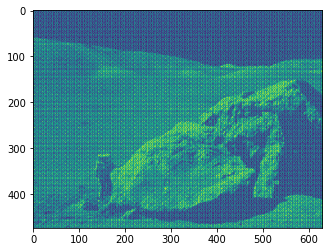

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy
from scipy import fftpack
from scipy import optimize

#import the file, plot the image and define the FFT
img = plt.imread("images/moonlanding.png")
imgplot = plt.imshow(img)
img_fft = fftpack.fft2(img)

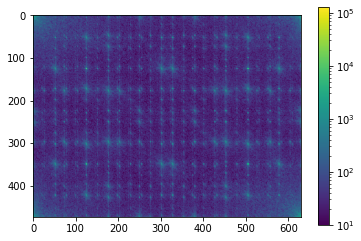

In [19]:
from matplotlib.colors import LogNorm
#Plot the FFT
spec_img = np.abs(img_fft)
plt.imshow(spec_img, norm=LogNorm(vmin=10))
plt.colorbar()

#The most intense regions are indeed those found at the corners 
#of the plotted region

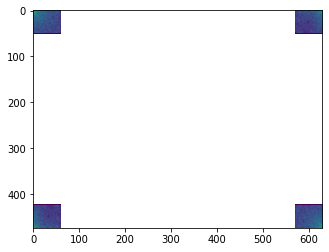

In [21]:
#select those regions masking (qualitatively) the ones associated to the noise
img_fft2 = img_fft.copy()


#initialize r and c as the number of rows and columns of the FFT
r, c = img_fft2.shape
img_fft2[50:r - 50] = 0
img_fft2[:, 60:c - 60] = 0

#plot the result of the filtering
plt.imshow(np.abs(img_fft2), norm=LogNorm(vmin=10))

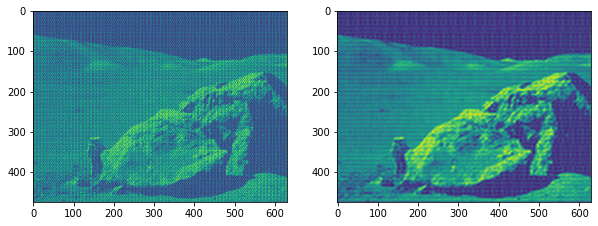

In [22]:
#Use inverse Fourier transform and plot the result, comparing it with the 
#initial image
img_new = fftpack.ifft2(img_fft2).real
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(img)
axes[1].imshow(img_new)